In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data set with first column (district name) set to index
df = pd.read_excel("complete_data.xlsx", index_col =0)

In [3]:
df.head()

,District Code,High Needs#,High Needs%,English Learners#,English Learners%,First Language Not English#,First Language Not English%,Low Income#,Low Income%,Students with Disabilities#.1,...,Total # of Teachers (FTE),% of Teachers Licensed,Student / Teacher Ratio,Percent of Experienced Teachers,Percent of Teachers without Waiver or Provisional License,Percent Teaching In-Field,CleanedName,MEMBERS,Population,DOR Income Per Capita
District Name,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),4450000,"1,005",70.7,256,18.0,967,68.0,837,58.9,166,...,119.6,99.2,11.9 to 1,81.5,88.3,90.5,abby kelley foster charter public,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,10000,"1,029",47.3,236,11.0,362,16.9,736,34.4,387,...,153.8,97.1,13.9 to 1,81.3,89.6,95.7,NaN,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),4120000,332,71.1,44,9.4,158,33.8,273,58.5,115,...,49.6,65.6,9.4 to 1,37.3,95.6,47.3,academy of the pacific rim charter public,Boston,675647.0,55038.000
Acton-Boxborough,6000000,"1,538",29.6,317,6.2,"1,141",22.2,546,10.6,803,...,395.4,100.0,13.0 to 1,88.3,97.5,98.8,NaN,"Acton, Boxborough",29527.0,69189.500
Acushnet,30000,415,42.7,6,0.6,17,1.8,320,33.2,154,...,76.0,100.0,12.7 to 1,78.9,92.1,94.7,NaN,Acushnet,10559.0,35648.000


In [4]:
df.drop(['High Needs#', 'English Learners#', 'First Language Not English#', 'Low Income#', 'Students with Disabilities#.1', 'CleanedName', '# in Cohort', 'District Code'], axis = 1, inplace=True)

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
df.head()

,High Needs%,English Learners%,First Language Not English%,Low Income%,Students with Disabilities%.1,Overall Classification,Reason for Classification,Progress Toward Improvement Targets (%),In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,% Graduated,% Still in School,% Non-Grad Completers,% H.S. Equiv.,% Dropped Out,% Permanently Excluded,Total # of Teachers (FTE),% of Teachers Licensed,Student / Teacher Ratio,Percent of Experienced Teachers,Percent of Teachers without Waiver or Provisional License,Percent Teaching In-Field,MEMBERS,Population,DOR Income Per Capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9 to 1,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9 to 1,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4 to 1,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0 to 1,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Acushnet,42.7,0.6,1.8,33.2,15.8,Not requiring assistance or intervention,Substantial progress toward targets,58.0,"$14,679,700.00",965.8,"$15,199.52","$18,752,410.80","1,254.7","$14,945.73",NaN,NaN,NaN,NaN,NaN,NaN,76.0,100.0,12.7 to 1,78.9,92.1,94.7,Acushnet,10559.0,35648.000


In [6]:
df.shape

(399, 29)

In [7]:
# drop rows where graduation rate = NaN; these districts do not include high school grades and feed into other districts for grades 9-12
df.dropna(subset = ["% Graduated"], inplace = True)

## 93 columns would be dropped

In [8]:
df.shape

(306, 29)

In [9]:
df.isnull().sum()

High Needs%                                                   0
English Learners%                                             0
First Language Not English%                                   0
Low Income%                                                   0
Students with Disabilities%.1                                 0
Overall Classification                                        1
Reason for Classification                                     1
Progress Toward Improvement Targets (%)                       9
In-District Expenditures                                      1
Total In-district FTEs                                        1
In-District Expenditures per Pupil                            1
Total Expenditures                                            1
Total Pupil FTEs                                              1
Total Expenditures per Pupil                                  1
% Graduated                                                   0
% Still in School                       

In [10]:
df[df['Overall Classification'].isna()]

,High Needs%,English Learners%,First Language Not English%,Low Income%,Students with Disabilities%.1,Overall Classification,Reason for Classification,Progress Toward Improvement Targets (%),In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,% Graduated,% Still in School,% Non-Grad Completers,% H.S. Equiv.,% Dropped Out,% Permanently Excluded,Total # of Teachers (FTE),% of Teachers Licensed,Student / Teacher Ratio,Percent of Experienced Teachers,Percent of Teachers without Waiver or Provisional License,Percent Teaching In-Field,MEMBERS,Population,DOR Income Per Capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
State Totals,55.1,12.1,25.0,42.3,19.4,NaN,NaN,NaN,"$18,401,964,825.00","865,749.1","$21,255.54","$20,737,958,663.00","947,578.4","$21,885.22",89.2,4.5,0.9,0.2,5.3,0.0,"76,977.6",97.1,11.9 to 1,81.3,93.4,92.3,State Totals,NaN,NaN


In [11]:
#drop "State Totals" row
df.drop(['State Totals'], axis = 0, inplace = True)

In [12]:
df.columns

Index(['High Needs%', 'English Learners%', 'First Language Not English%',
       'Low Income%', 'Students with Disabilities%.1',
       'Overall Classification', 'Reason for Classification',
       'Progress Toward Improvement Targets (%)', 'In-District Expenditures',
       'Total In-district FTEs', 'In-District Expenditures per Pupil',
       'Total Expenditures', 'Total Pupil FTEs',
       'Total Expenditures per Pupil', '% Graduated', '% Still in School',
       '% Non-Grad Completers', '% H.S. Equiv.', '% Dropped Out',
       '% Permanently Excluded', 'Total # of Teachers (FTE)',
       '% of Teachers Licensed', 'Student / Teacher Ratio',
       'Percent of Experienced Teachers',
       'Percent of Teachers without Waiver or Provisional License',
       'Percent Teaching In-Field', 'MEMBERS', 'Population',
       'DOR Income Per Capita'],
      dtype='object')

In [13]:
df.rename(columns={
    'District Name': 'district_name',
    'High Needs%' : 'high_needs_pct',
    'English Learners%' : 'english_learners_pct',
    'First Language Not English%' : 'first_language_not_english_pct',
    'Low Income%': 'low_income_pct',
    'Students with Disabilities%.1': 'students_with_disabilities_pct',
    'Overall Classification': 'overall_classification',
    'Reason for Classification': 'reason_for_classification',
    'Progress Toward Improvement Targets (%)': 'progress_toward_improvement_targets_pct',
    'In-District Expenditures': 'in_district_expenditures',
    'Total In-district FTEs': 'total_in_district_FTEs',
    'In-District Expenditures per Pupil': 'in_district_expenditures_per_pupil',
    'Total Expenditures': 'total_expenditures',
    'Total Pupil FTEs': 'total_pupil_FTEs',
    'Total Expenditures per Pupil': 'total_expenditures_per_pupil',
    '% Graduated': 'graduation_rate_pct',
    '% Still in School': 'still_in_school_pct',
    '% Non-Grad Completers': 'non_grad_completers_pct',
    '% H.S. Equiv.': 'hs_equivalency_pct',
    '% Dropped Out': 'dropout_rate_pct',
    '% Permanently Excluded': 'permanently_excluded_pct',
    'Total # of Teachers (FTE)': 'total_teachers_FTE',
    '% of Teachers Licensed': 'teachers_licensed_pct',
    'Student / Teacher Ratio': 'student_teacher_ratio',
    'Percent of Experienced Teachers': 'experienced_teachers_pct',
    'Percent of Teachers without Waiver or Provisional License': 'teachers_without_waiver_pct',
    'Percent Teaching In-Field': 'teaching_in_field_pct',
    'MEMBERS': 'members', 
    'Population': 'population', 
    'DOR Income Per Capita' : 'DOR_income_per_capita'}, inplace=True)

In [14]:
df.head()

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9 to 1,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9 to 1,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4 to 1,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0 to 1,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,23.6,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$15,065,009.41",964.3,"$15,623.23","$15,065,009.41",964.3,"$15,623.23",99.3,0.7,0.0,0.0,0.0,0.0,80.5,92.3,12.0 to 1,80.8,78.9,82.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


**Change the Student / teacher ratio values to the numeric by keeping the first decimal value as data.**

In [15]:
df["student_teacher_ratio"] = (
    df["student_teacher_ratio"]
    .astype(str)
    .str.extract(r'([\d\.]+)')  # Extract numeric part before 'to'
    .astype(float)
)

In [16]:
df.head()

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,23.6,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$15,065,009.41",964.3,"$15,623.23","$15,065,009.41",964.3,"$15,623.23",99.3,0.7,0.0,0.0,0.0,0.0,80.5,92.3,12.0,80.8,78.9,82.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


In [17]:
df.isnull().sum()

high_needs_pct                              0
english_learners_pct                        0
first_language_not_english_pct              0
low_income_pct                              0
students_with_disabilities_pct              0
overall_classification                      0
reason_for_classification                   0
progress_toward_improvement_targets_pct     8
in_district_expenditures                    1
total_in_district_FTEs                      1
in_district_expenditures_per_pupil          1
total_expenditures                          1
total_pupil_FTEs                            1
total_expenditures_per_pupil                1
graduation_rate_pct                         0
still_in_school_pct                         0
non_grad_completers_pct                     0
hs_equivalency_pct                          0
dropout_rate_pct                            0
permanently_excluded_pct                    0
total_teachers_FTE                          1
teachers_licensed_pct             

In [18]:
df[df['population'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argosy Collegiate Charter School (District),85.0,22.1,26.2,74.1,24.2,Not requiring assistance or intervention,Moderate progress toward targets,43.0,"$10,104,246.97",546.6,"$18,485.63","$10,104,246.97",546.6,"$18,485.63",74.5,7.3,0.0,0.0,16.4,1.8,32.6,68.9,16.9,47.6,75.2,53.1,Argosy Collegiate Charter School (District),NaN,NaN
Assabet Valley Regional Vocational Technical,58.9,5.9,23.9,41.0,24.1,Not requiring assistance or intervention,Substantial progress toward targets,64.0,"$29,035,656.09","1,092.2","$26,584.56","$29,178,846.47","1,092.8","$26,700.99",97.0,0.0,0.0,0.0,3.0,0.0,111.2,97.3,10.1,88.3,92.8,93.8,Assabet Valley Regional Vocational Technical,NaN,NaN
Ayer Shirley School District,45.5,4.3,7.4,32.6,19.3,Not requiring assistance or intervention,Moderate progress toward targets,42.0,"$32,042,979.18","1,641.4","$19,521.74","$37,038,728.96","1,885.5","$19,643.98",88.9,7.1,2.0,0.0,2.0,0.0,145.8,99.3,11.2,85.0,95.9,94.7,Ayer Shirley School District,NaN,NaN
Baystate Academy Charter Public School (District),88.8,8.5,23.4,84.3,22.1,Requiring assistance or intervention,In need of focused/targeted support,42.0,"$9,211,962.95",391.8,"$23,510.70","$9,211,962.95",391.8,"$23,510.70",87.0,1.9,0.0,0.0,9.3,1.9,56.1,46.0,7.2,28.0,80.4,35.6,Baystate Academy Charter Public School (District),NaN,NaN
Blackstone Valley Regional Vocational Technical,25.0,0.5,5.4,15.0,12.5,Not requiring assistance or intervention,Meeting or exceeding targets,75.0,"$29,250,651.53","1,225.1","$23,876.13","$29,262,101.53","1,227.4","$23,840.72",100.0,0.0,0.0,0.0,0.0,0.0,107.0,100.0,11.5,89.7,88.8,90.7,Blackstone Valley Regional Vocational Technical,NaN,NaN
Blue Hills Regional Vocational Technical,57.5,1.1,5.7,39.8,26.8,Not requiring assistance or intervention,Meeting or exceeding targets,95.0,"$24,093,331.62",895.0,"$26,919.92","$24,101,256.62",896.2,"$26,892.72",99.0,0.5,0.0,0.0,0.5,0.0,80.8,100.0,11.4,93.6,91.3,98.8,Blue Hills Regional Vocational Technical,NaN,NaN
Boston Green Academy Horace Mann Charter School (District),88.2,14.7,34.5,79.4,31.5,Not requiring assistance or intervention,Substantial progress toward targets,54.0,"$11,738,816.83",455.0,"$25,800.62","$11,738,816.83",455.0,"$25,800.62",88.9,7.9,3.2,0.0,0.0,0.0,46.6,93.3,10.2,68.2,91.0,80.0,Boston Green Academy Horace Mann Charter Schoo...,NaN,NaN
Bristol County Agricultural,41.3,0.0,0.0,30.4,15.7,Not requiring assistance or intervention,Substantial progress toward targets,54.0,"$13,119,525.04",543.5,"$24,138.96","$13,119,525.04",543.5,"$24,138.96",98.1,0.0,0.0,0.0,1.9,0.0,46.8,97.9,11.7,74.5,87.2,85.7,Bristol County Agricultural,NaN,NaN
Bristol-Plymouth Regional Vocational Technical,40.8,0.5,1.5,30.8,15.2,Not requiring assistance or intervention,Substantial progress toward targets,69.0,"$31,146,256.00","1,281.5","$24,304.53","$31,243,119.00","1,298.7","$24,057.23",96.0,0.6,0.0,0.0,3.4,0.0,101.8,100.0,12.9,86.7,91.6,96.1,Bristol-Plymouth Regional Vocational Technical,NaN,NaN


In [19]:
df[df['progress_toward_improvement_targets_pct'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,33.6,77.6,39.8,Insufficient data,Insufficient data,NaN,"$9,926,653.93",323.7,"$30,662.39","$9,926,653.93",323.7,"$30,662.39",8.0,56.3,1.1,0.0,34.5,0.0,29.5,88.2,10.9,89.8,93.2,64.9,Boston,675647.0,55038.0
Hatfield,39.1,0.3,0.9,21.7,26.4,Insufficient data,Insufficient data,NaN,"$7,521,780.22",349.4,"$21,527.71","$8,942,427.84",429.0,"$20,844.82",92.3,0.0,0.0,0.0,7.7,0.0,39.3,97.5,8.8,80.9,87.3,93.0,Hatfield,3352.0,39946.0
Lowell Middlesex Academy Charter (District),88.0,0.0,1.2,74.7,36.1,Requiring assistance or intervention,In need of focused/targeted support,NaN,"$1,549,766.00",96.6,"$16,044.79","$1,549,766.00",96.6,"$16,044.79",64.5,29.0,0.0,0.0,6.5,0.0,5.5,72.7,15.1,72.7,63.6,60.0,Lowell,115554.0,23092.0
Ma Academy for Math and Science,2.0,0.0,0.0,2.0,0.0,Insufficient data,Insufficient data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,0.0,6.0,100.0,16.7,100.0,83.3,100.0,Ma Academy for Math and Science,NaN,NaN
Martha's Vineyard Charter Public School (District),53.6,2.2,4.4,43.1,24.9,Insufficient data,Insufficient data,NaN,"$5,535,502.45",180.2,"$30,715.25","$5,535,502.45",180.2,"$30,715.25",77.8,0.0,0.0,0.0,22.2,0.0,20.2,82.6,9.0,47.6,81.8,91.7,Martha's Vineyard Charter Public School (Distr...,NaN,NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.8,76.4,8.9,Insufficient data,Insufficient data,NaN,"$5,589,680.89",199.9,"$27,966.58","$5,589,680.89",199.9,"$27,966.58",4.3,40.4,0.0,0.0,55.3,0.0,12.0,66.5,17.0,18.4,77.0,42.9,"Phoenix Academy Charter Public High School, Ch...",NaN,NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,37.6,88.0,25.6,Insufficient data,Insufficient data,NaN,"$2,855,250.66",114.5,"$24,943.22","$2,855,250.66",114.5,"$24,943.22",20.8,25.0,0.0,0.0,54.2,0.0,12.0,66.7,10.4,25.0,50.0,53.8,"Phoenix Academy Public Charter High School, La...",NaN,NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,22.9,91.6,24.7,Insufficient data,Insufficient data,NaN,"$4,063,710.21",167.8,"$24,217.58","$4,063,710.21",167.8,"$24,217.58",9.6,42.3,0.0,0.0,48.1,0.0,13.5,51.9,12.3,22.2,92.6,30.8,"Phoenix Academy Public Charter High School, Sp...",NaN,NaN


In [20]:
df[df['in_district_expenditures'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ma Academy for Math and Science,2.0,0.0,0.0,2.0,0.0,Insufficient data,Insufficient data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,0.0,6.0,100.0,16.7,100.0,83.3,100.0,Ma Academy for Math and Science,NaN,NaN


In [21]:
df[df['total_teachers_FTE'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Foxborough Regional Charter (District),51.6,6.9,17.1,41.8,9.3,Not requiring assistance or intervention,Moderate progress toward targets,40.0,"$23,813,198.62","1,556.7","$15,297.53","$23,813,198.62","1,556.7","$15,297.53",98.8,0.0,0.0,0.0,1.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"Attleboro, Avon, Brockton, Canton, Easton, Fox...",449705.0,51027.157895


In [22]:
# fill null values in 'population' for regional school districts
df_updates = pd.read_excel("Missing Regional Schools.xlsx")
df_updates

,District Name,members,population,DOR_income_per_capita
0,Ayer Shirley School District,"Ayer, Shirley",15910,33866.00000
1,Dudley-Charlton Reg,"Dudley, Charlton",41484,35222.00000
2,Hoosac Valley Regional,"Adams, Cheshire",11424,27161.00000
3,Manchester Essex Regional,"Manchester, Essex",9070,125051.50000
4,Martha's Vineyard,"Aquinnah, Chilmark, Edgartown, Oak Bluffs, Tis...",20530,47239.66667
5,Monomoy Regional School District,"Chatham, Harwich",20034,55943.00000
6,Quaboag Regional,"Warren, West Brookfield",8808,28922.50000
7,Somerset Berkley Regional School District,"Somerset, Berkley",25067,37727.50000


In [23]:
df_merged = df.merge(df_updates, on="District Name", how="left", suffixes=("", "_update"))


In [24]:
df_merged["population"] = df_merged["population"].fillna(df_merged["population_update"])
df_merged["DOR_income_per_capita"] = df_merged["DOR_income_per_capita"].fillna(df_merged["DOR_income_per_capita_update"])
df_merged["members"]=df_merged["members"].fillna(df_merged["members_update"])

In [25]:
df_merged.head(20)

,District Name,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita,members_update,population_update,DOR_income_per_capita_update
0,Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$24,231,438.78","1,415.8","$17,114.65","$24,231,438.78","1,415.8","$17,114.65",100.0,0.0,0.0,0.0,0.0,0.0,119.6,99.2,11.9,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375,NaN,NaN,NaN
1,Abington,47.3,11.0,16.9,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,"$35,603,421.16","2,143.5","$16,609.95","$41,098,932.87","2,297.3","$17,890.10",88.9,1.3,0.7,0.0,9.2,0.0,153.8,97.1,13.9,81.3,89.6,95.7,Abington,17062.0,37848.000,NaN,NaN,NaN
2,Academy Of the Pacific Rim Charter Public (Dis...,71.1,9.4,33.8,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,"$12,801,946.92",467.4,"$27,392.63","$12,801,946.92",467.4,"$27,392.63",96.3,1.9,0.0,0.0,1.9,0.0,49.6,65.6,9.4,37.3,95.6,47.3,Boston,675647.0,55038.000,NaN,NaN,NaN
3,Acton-Boxborough,29.6,6.2,22.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,"$100,564,755.40","5,181.7","$19,407.68","$109,746,603.20","5,302.1","$20,698.70",96.1,3.2,0.2,0.0,0.4,0.0,395.4,100.0,13.0,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500,NaN,NaN,NaN
4,Advanced Math and Science Academy Charter (Dis...,26.0,1.4,23.6,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,"$15,065,009.41",964.3,"$15,623.23","$15,065,009.41",964.3,"$15,623.23",99.3,0.7,0.0,0.0,0.0,0.0,80.5,92.3,12.0,80.8,78.9,82.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000,NaN,NaN,NaN
5,Agawam,51.4,6.2,15.4,40.7,18.3,Not requiring assistance or intervention,Moderate progress toward targets,46.0,"$71,958,484.59","3,524.8","$20,414.91","$78,821,069.71","3,700.6","$21,299.54",88.0,1.1,1.9,0.4,8.6,0.0,275.6,100.0,12.5,89.4,96.7,96.3,Agawam,28692.0,31126.000,NaN,NaN,NaN
6,Amesbury,46.4,2.7,4.5,33.8,23.7,Not requiring assistance or intervention,Moderate progress toward targets,47.0,"$39,966,168.64","1,789.1","$22,338.70","$45,461,590.81","1,981.4","$22,944.18",88.3,2.5,0.8,0.8,7.5,0.0,168.4,100.0,10.6,89.0,95.3,97.7,Amesbury,17366.0,41139.000,NaN,NaN,NaN
7,Amherst-Pelham,44.0,7.3,19.6,29.8,24.2,Requiring assistance or intervention,In need of focused/targeted support,33.0,"$32,489,016.00","1,241.1","$26,177.60","$37,562,376.22","1,390.9","$27,005.81",90.9,4.1,0.9,0.9,3.2,0.0,120.1,91.6,10.2,81.3,94.0,84.1,"Amherst, Pelham, Leverett, Shutesbury",44125.0,34325.000,NaN,NaN,NaN
8,Andover,31.3,3.4,17.4,11.5,19.2,Not requiring assistance or intervention,Meeting or exceeding targets,76.0,"$120,895,506.40","5,569.1","$21,708.27","$128,212,610.90","5,663.7","$22,637.61",96.3,2.6,0.5,0.0,0.7,0.0,471.0,99.8,11.7,89.2,97.5,99.0,Andover,36569.0,87282.000,NaN,NaN,NaN
9,Argosy Collegiate Charter School (District),85.0,22.1,26.2,74.1,24.2,Not requiring assistance or intervention,Moderate progress toward targets,43.0,"$10,104,246.97",546.6,"$18,485.63","$10,104,246.97",546.6,"$18,485.63",74.5,7.3,0.0,0.0,16.4,1.8,32.6,68.9,16.9,47.6,75.2,53.1,Argosy Collegiate Charter School (District),NaN,NaN,NaN,NaN,NaN


In [26]:
df_final = df_merged.drop(columns=["population_update", "DOR_income_per_capita_update", "members_update"])
df_final = df_final.set_index("District Name")

In [27]:
df=df_final

In [28]:
# drop rows where population = NaN; these are charter schools and vocational schools
df.dropna(subset = ["population"], inplace = True)

In [29]:
df.isnull().sum()

high_needs_pct                             0
english_learners_pct                       0
first_language_not_english_pct             0
low_income_pct                             0
students_with_disabilities_pct             0
overall_classification                     0
reason_for_classification                  0
progress_toward_improvement_targets_pct    3
in_district_expenditures                   0
total_in_district_FTEs                     0
in_district_expenditures_per_pupil         0
total_expenditures                         0
total_pupil_FTEs                           0
total_expenditures_per_pupil               0
graduation_rate_pct                        0
still_in_school_pct                        0
non_grad_completers_pct                    0
hs_equivalency_pct                         0
dropout_rate_pct                           0
permanently_excluded_pct                   0
total_teachers_FTE                         1
teachers_licensed_pct                      1
student_te

In [30]:
df[df['progress_toward_improvement_targets_pct'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,33.6,77.6,39.8,Insufficient data,Insufficient data,NaN,"$9,926,653.93",323.7,"$30,662.39","$9,926,653.93",323.7,"$30,662.39",8.0,56.3,1.1,0.0,34.5,0.0,29.5,88.2,10.9,89.8,93.2,64.9,Boston,675647.0,55038.0
Hatfield,39.1,0.3,0.9,21.7,26.4,Insufficient data,Insufficient data,NaN,"$7,521,780.22",349.4,"$21,527.71","$8,942,427.84",429.0,"$20,844.82",92.3,0.0,0.0,0.0,7.7,0.0,39.3,97.5,8.8,80.9,87.3,93.0,Hatfield,3352.0,39946.0
Lowell Middlesex Academy Charter (District),88.0,0.0,1.2,74.7,36.1,Requiring assistance or intervention,In need of focused/targeted support,NaN,"$1,549,766.00",96.6,"$16,044.79","$1,549,766.00",96.6,"$16,044.79",64.5,29.0,0.0,0.0,6.5,0.0,5.5,72.7,15.1,72.7,63.6,60.0,Lowell,115554.0,23092.0


In [31]:
# drop Boston Day and Evening Academy Charter (District) and Lowell Middlesex Academy Charter (District) (charter schools with no accountability data)
df.drop(['Boston Day and Evening Academy Charter (District)', 'Lowell Middlesex Academy Charter (District)'], axis = 0, inplace = True)

In [32]:
df[df['total_teachers_FTE'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,total_in_district_FTEs,in_district_expenditures_per_pupil,total_expenditures,total_pupil_FTEs,total_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Foxborough Regional Charter (District),51.6,6.9,17.1,41.8,9.3,Not requiring assistance or intervention,Moderate progress toward targets,40.0,"$23,813,198.62","1,556.7","$15,297.53","$23,813,198.62","1,556.7","$15,297.53",98.8,0.0,0.0,0.0,1.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"Attleboro, Avon, Brockton, Canton, Easton, Fox...",449705.0,51027.157895


In [33]:
# drop Foxborough Regional Charter (District) (charter school with teacher data)
df.drop(['Foxborough Regional Charter (District)'], axis = 0, inplace = True)

In [34]:
df.isnull().sum()

high_needs_pct                             0
english_learners_pct                       0
first_language_not_english_pct             0
low_income_pct                             0
students_with_disabilities_pct             0
overall_classification                     0
reason_for_classification                  0
progress_toward_improvement_targets_pct    1
in_district_expenditures                   0
total_in_district_FTEs                     0
in_district_expenditures_per_pupil         0
total_expenditures                         0
total_pupil_FTEs                           0
total_expenditures_per_pupil               0
graduation_rate_pct                        0
still_in_school_pct                        0
non_grad_completers_pct                    0
hs_equivalency_pct                         0
dropout_rate_pct                           0
permanently_excluded_pct                   0
total_teachers_FTE                         0
teachers_licensed_pct                      0
student_te

# Start the Correlation Matrix and figure out the multicollineraty and the correlation of each columns to target value. 

In [35]:
df.dtypes[df.dtypes=='object']

overall_classification                object
reason_for_classification             object
in_district_expenditures              object
total_in_district_FTEs                object
in_district_expenditures_per_pupil    object
total_expenditures                    object
total_pupil_FTEs                      object
total_expenditures_per_pupil          object
total_teachers_FTE                    object
members                               object
dtype: object

#### Removing the dollar sign and commas 

The columns which has dollar sign and , in it. 
* In-District Expenditures (remove dollar sign and , )
* In-District Expenditures per Pupil (remove dollar sign and , )
* Total Expenditures (remove dollar sign and , )
* Total Expenditures per Pupil
* Total # of Teachers (FTE) (remove ,)
* Total Pupil FTEs (remove ,)
* Total In-district FTEs ( remove ,)

In [36]:
## First we will clean the columns from $ sign and comma. 

# List of columns to clean
columns_to_clean = [
    'in_district_expenditures',
    'in_district_expenditures_per_pupil',
    'total_expenditures',
    'total_expenditures_per_pupil',
    'total_teachers_FTE',
    'total_pupil_FTEs',
    'total_in_district_FTEs'
]

In [37]:
# Clean the columns: remove commas and dollar signs, then convert to float
for col in columns_to_clean:
    df[col] = (
        df[col].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace('NaN', pd.NA)  # in case "NaN" is a string
        .astype(float)
    )

In [38]:
df.dtypes[df.dtypes =="object"]

overall_classification       object
reason_for_classification    object
members                      object
dtype: object

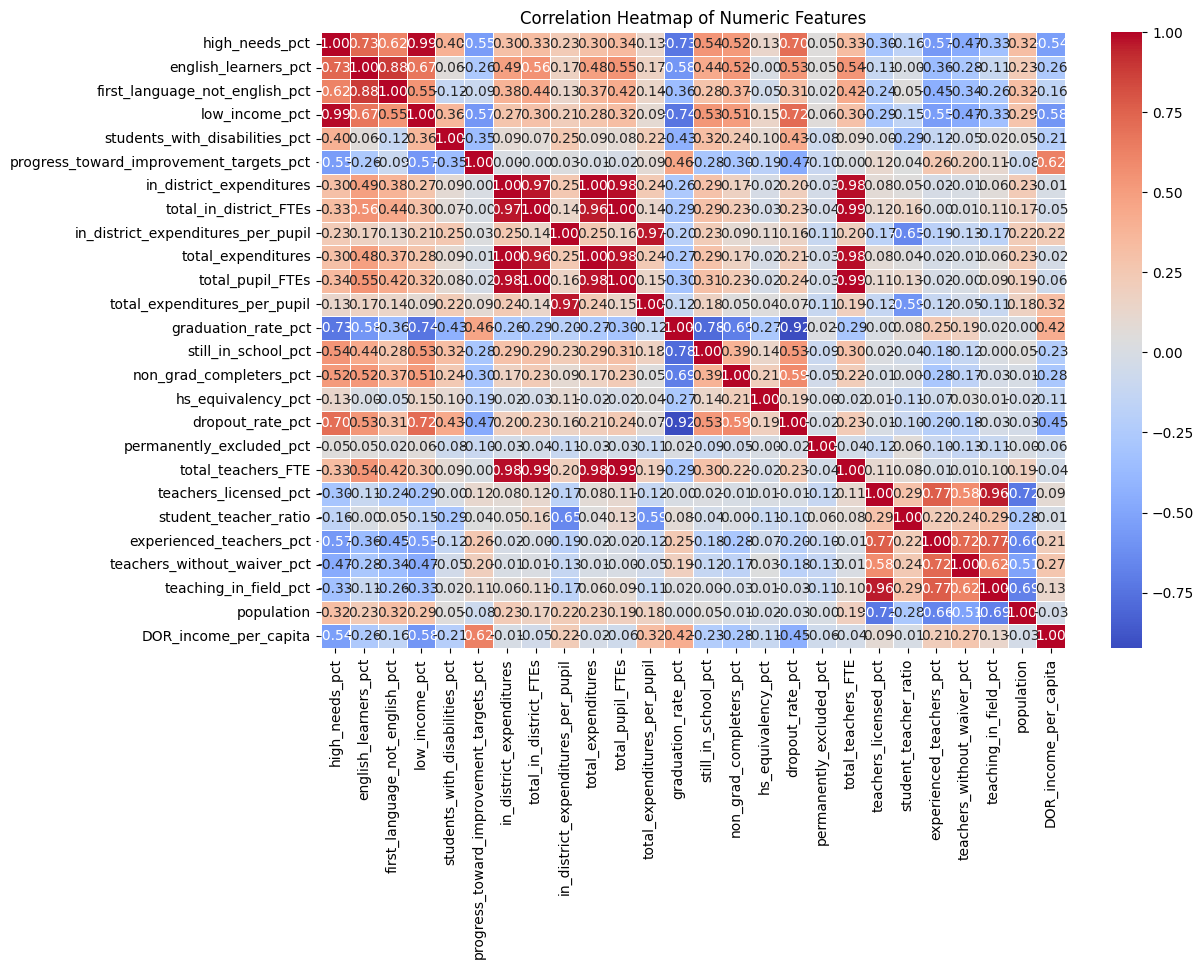

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Ensures only numeric columns are included

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Step 4: Add title and show plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Highly Positively Correlated (>= 0.7)**
| Feature 1                     | Feature 2                        | Corr ≈    |
| ----------------------------- | -------------------------------- | --------- |
| `high_needs_pct`              | `low_income_pct`                 | **0.90**  |
| `english_learners_pct`        | `first_language_not_english_pct` | **0.93**  |
| `in_district_expenditures`    | `total_expenditures`             | **≈1.00** |
| `total_in_district_FTEs`      | `total_teachers_FTE`             | **≈1.00** |
| `experienced_teachers_pct`    | `teaching_in_field_pct`          | **≈0.90** |
| `teachers_without_waiver_pct` | `teachers_licensed_pct`          | **≈0.90** |
| `in_district_expenditures`    | `total_in_district_FTEs`         | **≈0.90** |
| `total_pupil_FTEs`            | `total_expenditures`             | **≈0.90** |


**Highly Negatively Correlated (<= -0.7)**

| Feature 1             | Feature 2              | Corr ≈     |
| --------------------- | ---------------------- | ---------- |
| `graduation_rate_pct` | `dropout_rate_pct`     | **-0.90**  |
| `graduation_rate_pct` | `still_in_school_pct`  | **-0.87**  |
| `graduation_rate_pct` | `high_needs_pct`       | **-0.70+** |
| `graduation_rate_pct` | `low_income_pct`       | **-0.70+** |
| `graduation_rate_pct` | `english_learners_pct` | **-0.70+** |

Feature 2 has high correlation with graduation rate ( which is our target value)


#### Drop these columns, 

* first_language_not_english_pct
* total_expenditures
* total_teachers_FTE
* teaching_in_field_pct
* teachers_without_waiver_pct
* total_in_district_FTEs

In [40]:
columns_to_drop = [
    'first_language_not_english_pct',
    'total_expenditures',
    'total_teachers_FTE',
    'teaching_in_field_pct',
    'teachers_without_waiver_pct',
    'total_in_district_FTEs',
    'total_expenditures_per_pupil',
    'teachers_licensed_pct', 
    'total_pupil_FTEs'
]

df_clean = df.drop(columns=columns_to_drop)


In [41]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,student_teacher_ratio,experienced_teachers_pct,members,population,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,2.423144e+07,17114.65,100.0,0.0,0.0,0.0,0.0,0.0,11.9,81.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,0.0,9.2,0.0,13.9,81.3,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,1.280195e+07,27392.63,96.3,1.9,0.0,0.0,1.9,0.0,9.4,37.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,0.0,0.4,0.0,13.0,88.3,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,1.506501e+07,15623.23,99.3,0.7,0.0,0.0,0.0,0.0,12.0,80.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


In [42]:
df_clean.shape

(248, 20)

In [43]:
df_clean.dtypes

high_needs_pct                             float64
english_learners_pct                       float64
low_income_pct                             float64
students_with_disabilities_pct             float64
overall_classification                      object
reason_for_classification                   object
progress_toward_improvement_targets_pct    float64
in_district_expenditures                   float64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
still_in_school_pct                        float64
non_grad_completers_pct                    float64
hs_equivalency_pct                         float64
dropout_rate_pct                           float64
permanently_excluded_pct                   float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
members                                     object
population                                 float64
DOR_income_per_capita          

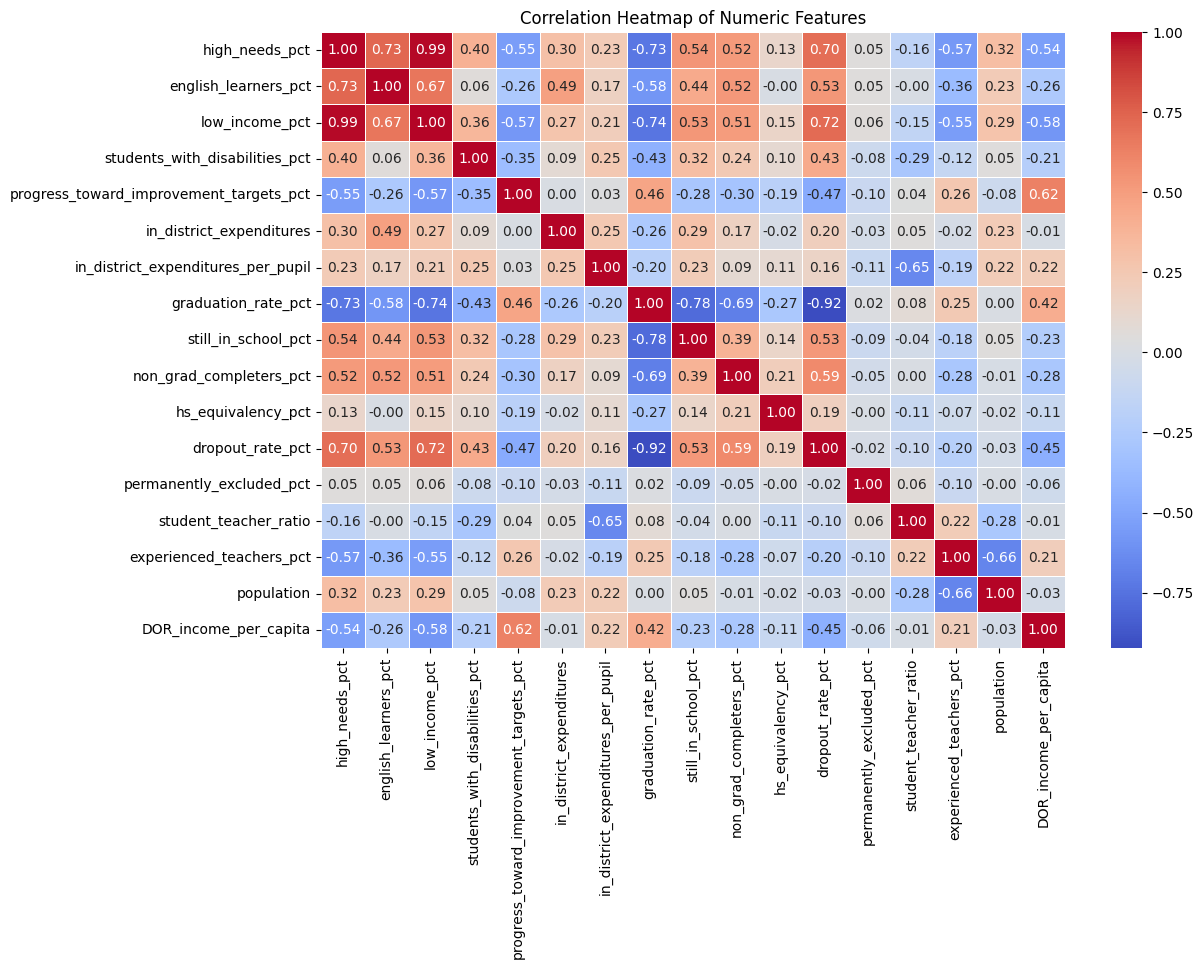

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)  # Ensures only numeric columns are included

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Step 4: Add title and show plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Compute and sort correlations with Target value**

In [45]:

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Calculate correlations with the target
target_corr = numeric_df.corr()['graduation_rate_pct'].sort_values(ascending=False)

# Drop the self-correlation (1.0)
target_corr = target_corr[target_corr.index != 'graduation_rate_pct']

# Display the correlation report
print("Correlation with graduation_rate_pct:")
print(target_corr)


Correlation with graduation_rate_pct:
progress_toward_improvement_targets_pct    0.460202
DOR_income_per_capita                      0.416730
experienced_teachers_pct                   0.248711
student_teacher_ratio                      0.080658
permanently_excluded_pct                   0.021128
population                                 0.002587
in_district_expenditures_per_pupil        -0.201466
in_district_expenditures                  -0.262960
hs_equivalency_pct                        -0.269725
students_with_disabilities_pct            -0.434210
english_learners_pct                      -0.581518
non_grad_completers_pct                   -0.692457
high_needs_pct                            -0.734205
low_income_pct                            -0.741776
still_in_school_pct                       -0.783853
dropout_rate_pct                          -0.922975
Name: graduation_rate_pct, dtype: float64


The column **"*permanently_excluded_pct, in_district_expenditures, population*"** has very weak correlation with target value. We can drop it.

In [46]:
columns_to_drop2 = [
    'permanently_excluded_pct',
    'in_district_expenditures', 
    'population'
]

df_clean = df_clean.drop(columns=columns_to_drop2)


In [47]:
df_clean.shape

(248, 17)

### Checking the OUTLIERS in a relationship with Target Value - graduation_rate_pct 


### Talk about these findings with team

These findings may appear to be outliers, but they might not actually be outliers. For instance, High percentages of English learners coupled with low graduation rates may seem unusual; however, this could represent a genuine situation. Instead of removing these cases, we should flag them. We can run our regression analysis both including and excluding these potential outliers. Afterwards, we can compare the results, including coefficients, R² values, and RMSE.

In [48]:
df_clean.dtypes

high_needs_pct                             float64
english_learners_pct                       float64
low_income_pct                             float64
students_with_disabilities_pct             float64
overall_classification                      object
reason_for_classification                   object
progress_toward_improvement_targets_pct    float64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
still_in_school_pct                        float64
non_grad_completers_pct                    float64
hs_equivalency_pct                         float64
dropout_rate_pct                           float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
members                                     object
DOR_income_per_capita                      float64
dtype: object

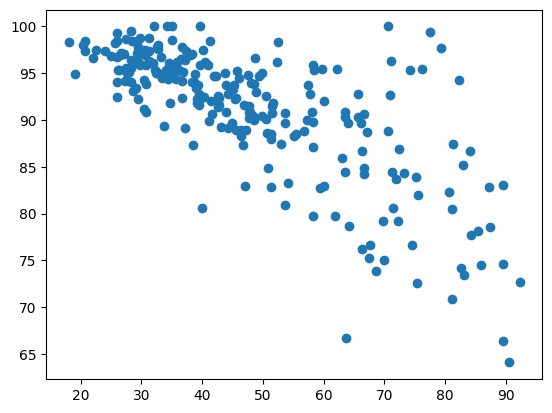

In [49]:
plt.scatter(x = 'high_needs_pct', y = 'graduation_rate_pct', data = df_clean)

In [50]:
df_clean.query('graduation_rate_pct < 60 and high_needs_pct > 80') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


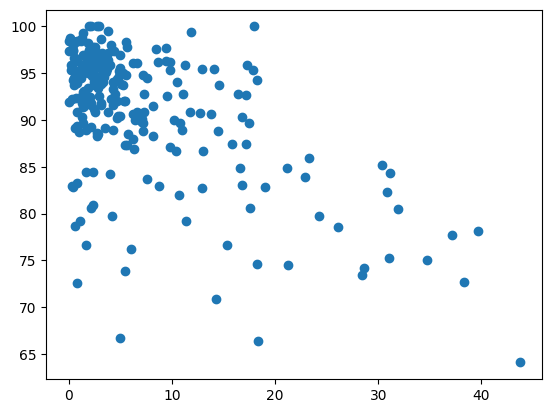

In [51]:
plt.scatter(x = 'english_learners_pct', y = 'graduation_rate_pct', data = df_clean)

In [52]:
df_clean.query('graduation_rate_pct < 40 and english_learners_pct > 50') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


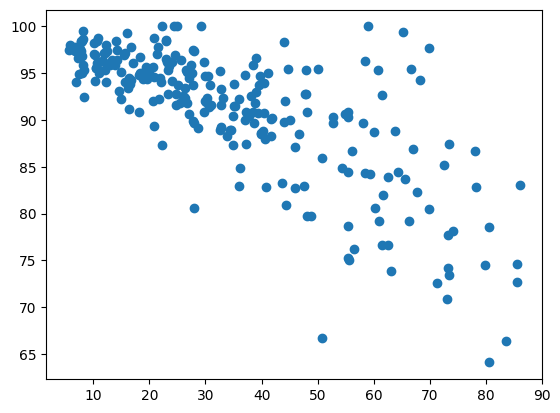

In [53]:
plt.scatter(x = 'low_income_pct', y = 'graduation_rate_pct', data = df_clean)

In [54]:
df_clean.query('graduation_rate_pct < 40 and low_income_pct > 60') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


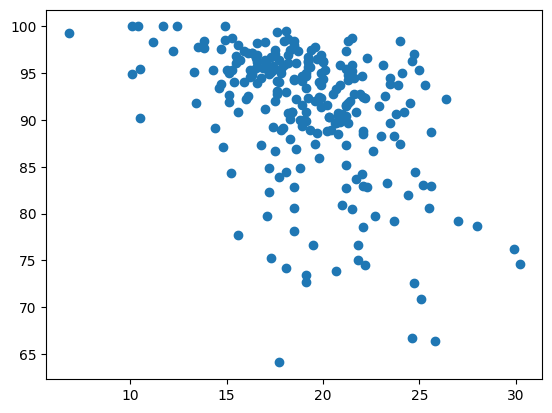

In [55]:
plt.scatter(x = 'students_with_disabilities_pct', y = 'graduation_rate_pct', data = df_clean)

In [56]:
df_clean.query('graduation_rate_pct < 40 and students_with_disabilities_pct >40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


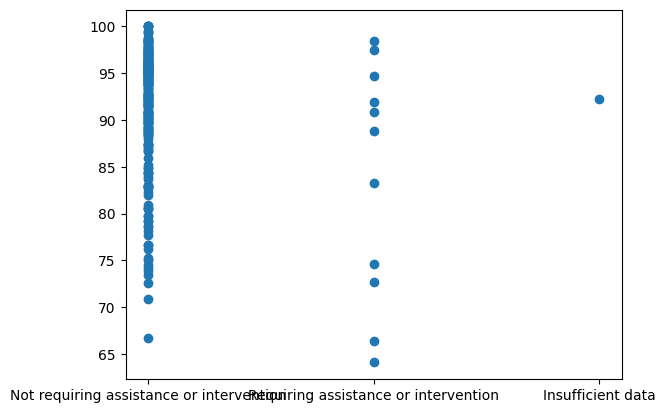

In [58]:
plt.scatter(x = 'overall_classification', y = 'graduation_rate_pct', data = df_clean)

In [59]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


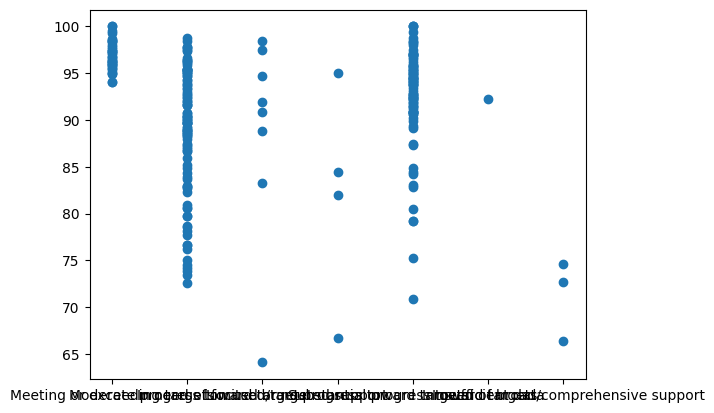

In [61]:
plt.scatter(x = 'reason_for_classification', y = 'graduation_rate_pct', data = df_clean)

In [62]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


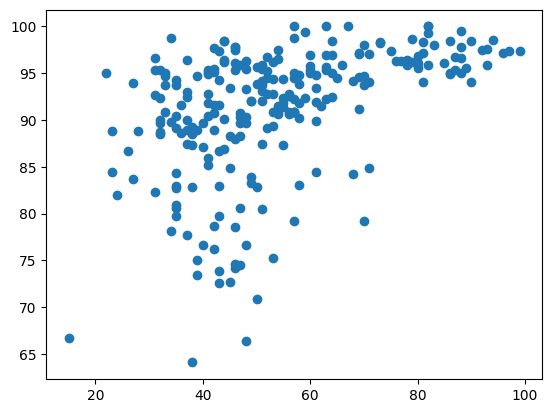

In [63]:
plt.scatter(x = 'progress_toward_improvement_targets_pct', y = 'graduation_rate_pct', data = df_clean)

In [64]:
df_clean.query('graduation_rate_pct < 40 and progress_toward_improvement_targets_pct< 20') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


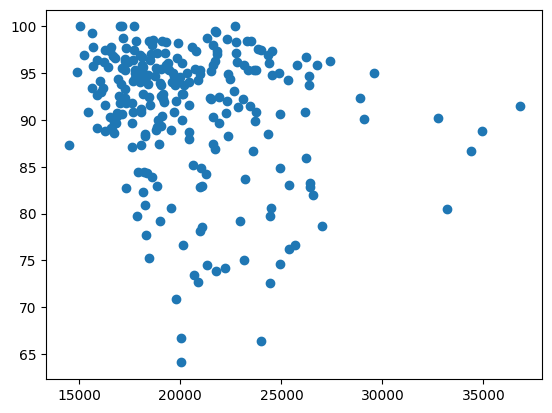

In [65]:
plt.scatter(x = 'in_district_expenditures_per_pupil', y = 'graduation_rate_pct', data = df_clean)

In [66]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


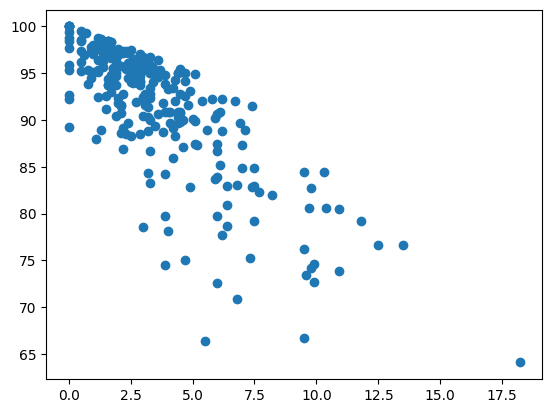

In [67]:
plt.scatter(x = 'still_in_school_pct', y = 'graduation_rate_pct', data = df_clean)

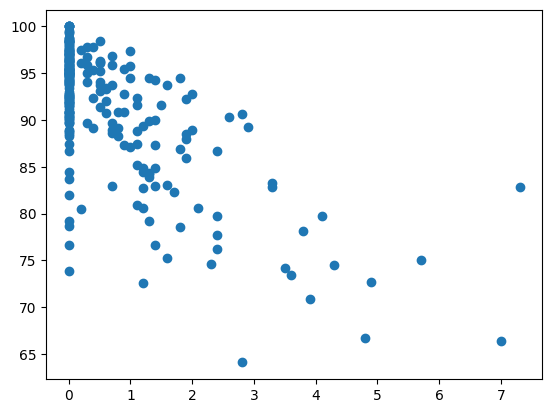

In [68]:
plt.scatter(x = 'non_grad_completers_pct', y = 'graduation_rate_pct', data = df_clean)

In [69]:
df_clean.query('graduation_rate_pct < 25 and non_grad_completers_pct<2') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


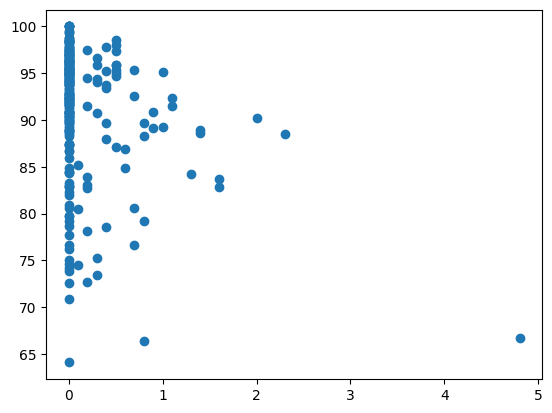

In [70]:
plt.scatter(x = 'hs_equivalency_pct', y = 'graduation_rate_pct', data = df_clean)

In [71]:
df_clean.query('graduation_rate_pct < 25 and hs_equivalency_pct==0') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


In [72]:
df_clean.query('hs_equivalency_pct>4') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
North Brookfield,63.7,5.0,50.7,24.6,Not requiring assistance or intervention,Limited or no progress toward targets,15.0,20008.84,66.7,9.5,4.8,4.8,14.3,10.8,74.7,North Brookfield,30230.0


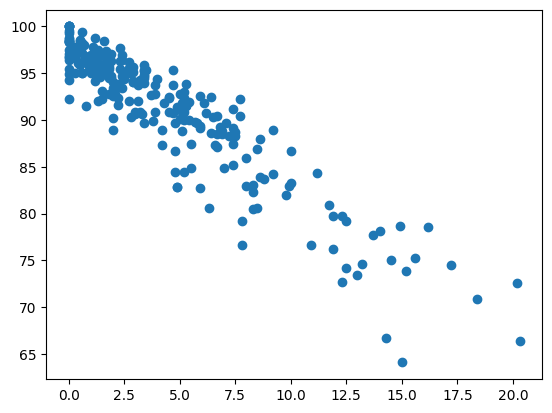

In [73]:
plt.scatter(x = 'dropout_rate_pct', y = 'graduation_rate_pct', data = df_clean)

In [74]:
df_clean.query('graduation_rate_pct < 20 and dropout_rate_pct<10') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


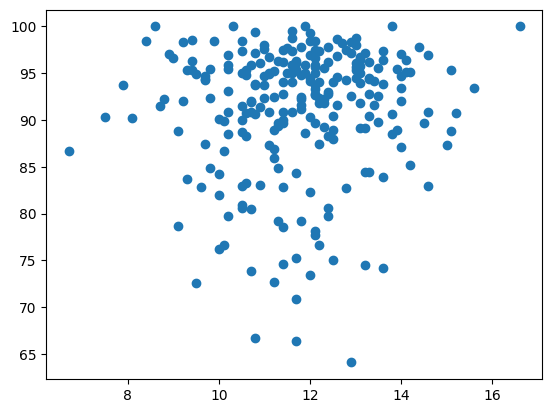

In [75]:
plt.scatter(x = 'student_teacher_ratio', y = 'graduation_rate_pct', data = df_clean)

In [76]:
df_clean.query('graduation_rate_pct < 25 and student_teacher_ratio<18') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


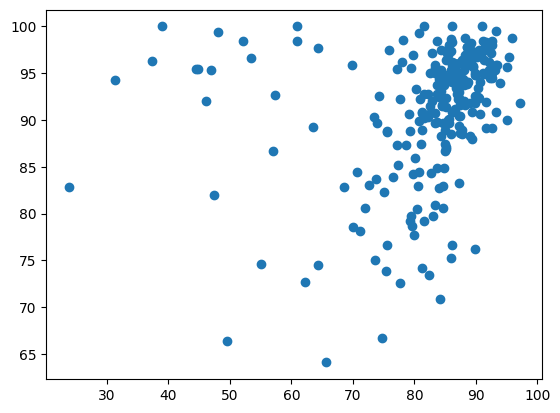

In [77]:
plt.scatter(x = 'experienced_teachers_pct', y = 'graduation_rate_pct', data = df_clean)

In [78]:
df_clean.query('graduation_rate_pct < 25 and experienced_teachers_pct>80') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


In [79]:
df_clean.query('graduation_rate_pct > 60 and experienced_teachers_pct<28') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Roxbury Preparatory Charter (District),87.3,19.0,78.2,18.5,Not requiring assistance or intervention,Substantial progress toward targets,50.0,26399.94,82.8,7.4,3.3,1.6,4.9,11.4,23.8,Boston,55038.0


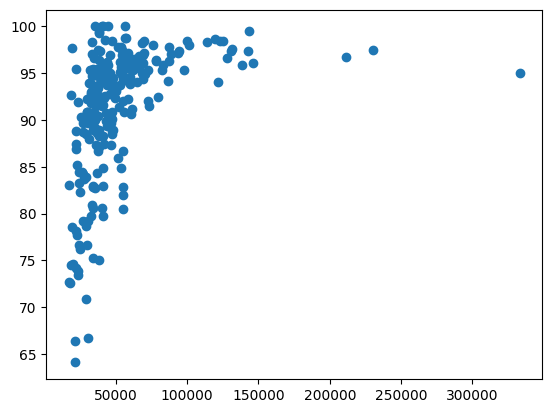

In [80]:
plt.scatter(x = 'DOR_income_per_capita', y = 'graduation_rate_pct', data = df_clean)

In [81]:
df_clean.query('graduation_rate_pct <20 and DOR_income_per_capita <60000') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,


In [82]:
df_clean.query('graduation_rate_pct >80 and DOR_income_per_capita > 300000') 


,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
District Name,,,,,,,,,,,,,,,,,
Weston,27.6,3.3,7.9,17.2,Not requiring assistance or intervention,Meeting or exceeding targets,86.0,29581.26,95.0,4.4,0.0,0.0,0.6,11.9,82.6,Weston,333105.0


C:\Users\Amanda\AppData\Local\Temp\ipykernel_67520\2484169903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Amanda\AppData\Local\Temp\ipykernel_67520\2484169903.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels)


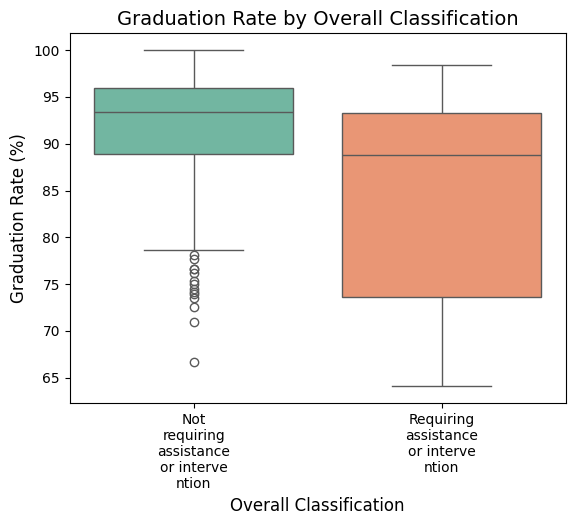

In [85]:
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='overall_classification', 
    y='graduation_rate_pct', 
    data=df[df['overall_classification'] != 'Insufficient data'],
    palette='Set2'
)

# Wrap x-axis labels properly
labels = [textwrap.fill(label.get_text(), 10) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.xlabel("Overall Classification", fontsize=12)
plt.ylabel("Graduation Rate (%)", fontsize=12)
plt.title("Graduation Rate by Overall Classification", fontsize=14)

plt.show()

C:\Users\Amanda\AppData\Local\Temp\ipykernel_67520\2863928703.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Amanda\AppData\Local\Temp\ipykernel_67520\2863928703.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels)


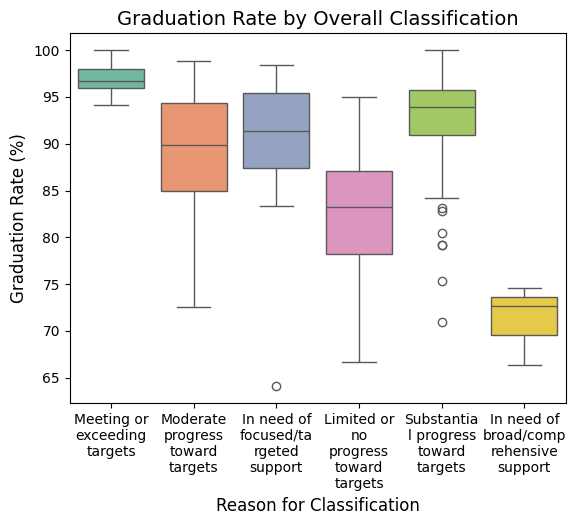

In [86]:
sns.boxplot(
    x='reason_for_classification', 
    y='graduation_rate_pct', 
    data=df[df['reason_for_classification'] != 'Insufficient data'],
    palette='Set2'
)

# Wrap x-axis labels properly
labels = [textwrap.fill(label.get_text(), 10) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.xlabel("Reason for Classification", fontsize=12)
plt.ylabel("Graduation Rate (%)", fontsize=12)
plt.title("Graduation Rate by Overall Classification", fontsize=14)

plt.show()